# Clasificación de Tweets de desastres naturales

## 0. Imports


agrego  bibliotecas para el manejo de graficas y recusos del sistema

In [198]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
import os
 
from matplotlib.colors import ListedColormap

## 1. Lectura del conjunto de datos

El conjunto de datos viene dividido en el train y el test, por esta razón se debe leer en variables diferentes 

In [199]:
import pandas as pd

X_train = pd.read_csv('train.csv')
X_test = pd.read_csv('test.csv')
text = pd.read_csv('train.csv')
X_train

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [200]:
X_test

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


## 2. Visualización del conjunto de datos

In [201]:
print("Tamaño del Train: ", len(X_train))
print("Tamaño del Test: ", len(X_test))
 


Tamaño del Train:  7613
Tamaño del Test:  3263


In [202]:
# Tweets falsos y verdaderos en Trian
X_train['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

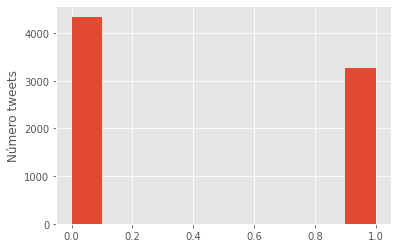

In [203]:
X_train['target'].hist()
plt.ylabel("Número tweets")
plt.show()

Siempre conveniente realizar un análisis exploratorio de la distribución de los datos para determinar la mejor manera de resolver el problema

### Número de palabras por Tweet

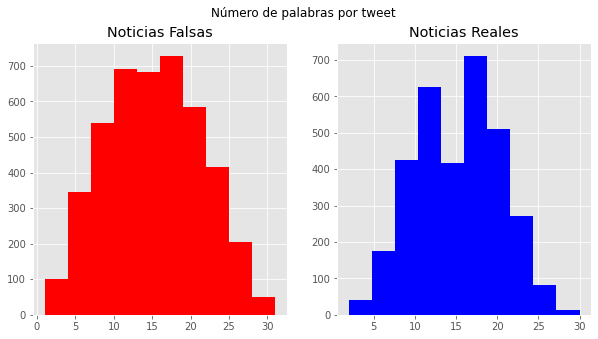

In [204]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5)) 
tweet_falso = X_train[X_train['target'] == 0]['text'].str.split().map(lambda x: len(x))
tweet_real = X_train[X_train['target'] == 1]['text'].str.split().map(lambda x: len(x))

ax1.hist(tweet_falso, color='red')
ax1.set_title('Noticias Falsas')
ax2.hist(tweet_real, color='blue')
ax2.set_title('Noticias Reales')
fig.suptitle('Número de palabras por tweet')
plt.show()

### Número de palabras únicas por Tweet

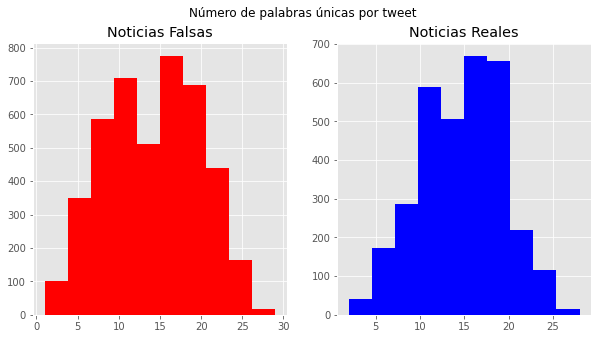

In [205]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

tweet_falso = X_train[X_train['target'] == 0]['text'].str.split().map(lambda x: len(set(x)))
tweet_real = X_train[X_train['target'] == 1]['text'].str.split().map(lambda x: len(set(x)))

ax1.hist(tweet_falso, color='red')
ax1.set_title('Noticias Falsas')

ax2.hist(tweet_real, color='blue')
ax2.set_title('Noticias Reales')

fig.suptitle('Número de palabras únicas por tweet')

plt.show()

### Longitud media de las palabras por Tweet

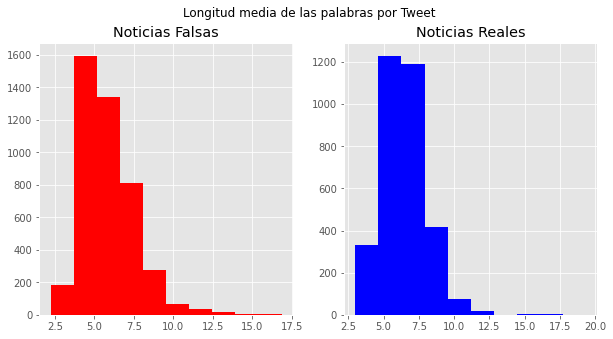

In [206]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

 
tweet_falso = X_train[X_train['target'] == 0]['text'].str.split().map(lambda x: np.mean([len(i) for i in x]))
tweet_real = X_train[X_train['target'] == 1]['text'].str.split().map(lambda x: np.mean([len(i) for i in x]))

ax1.hist(tweet_falso, color='red')
ax1.set_title('Noticias Falsas')

ax2.hist(tweet_real, color='blue')
ax2.set_title('Noticias Reales')

fig.suptitle('Longitud media de las palabras por Tweet')

plt.show()

### Número de caracteres por tweet

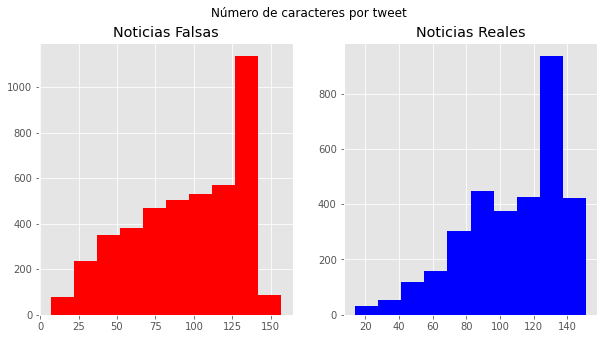

In [207]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

# Calculamos el número de caracteres por tweet
tweet_falso = X_train[X_train['target'] == 0]['text'].str.len()
tweet_real = X_train[X_train['target'] == 1]['text'].str.len()

ax1.hist(tweet_falso, color='red')
ax1.set_title('Noticias Falsas')

ax2.hist(tweet_real, color='blue')
ax2.set_title('Noticias Reales')

fig.suptitle('Número de caracteres por tweet')

plt.show()

Podríamos seguir calculando características de entrada como las siguientes:
* Número de palabras de fin por Tweet
* Número de urls por Tweet
* Media de caracteres por Tweet
* Número de caracteres por Tweet
* Número de signos de puntuación por Tweet
* Número de hashtags por Tweet
* Número de @ por tweet

### Stopwords más utilizadas

Estas palabras no tienen un significado por si solas, sino que modifican o acompañan a otras, este grupo suele estar conformado por artículos, pronombres, preposiciones, adverbios e incluso algunos verbos.

En el procesamiento de datos en lenguaje natural son filtradas antes o después del proceso en si, no se consideran por su nulo significado, en el caso de los buscadores como Google no lo consideran al momento de posicionar, pero si al momento de mostrar los resultados de búsqueda.

In [208]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [209]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [210]:
def  stopwords_promedio(clase):
    tweets_stopwords = {}
    for palabras in X_train[X_train['target'] == clase]['text'].str.split():
        sw = list(set(palabras).intersection(stopwords.words('english')))
        for i in sw:
            if i in tweets_stopwords.keys():
                tweets_stopwords[i] += 1
            else:
                tweets_stopwords[i] = 1
                
    top = sorted(tweets_stopwords.items(), key=lambda x:x[1],reverse=True)[:10]
    plt.bar(*zip(*top))
    plt.show()

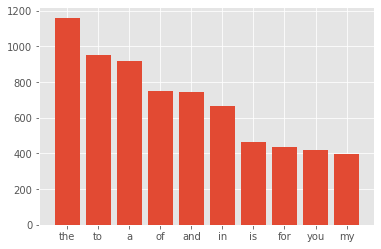

In [211]:
stopwords_promedio(0)

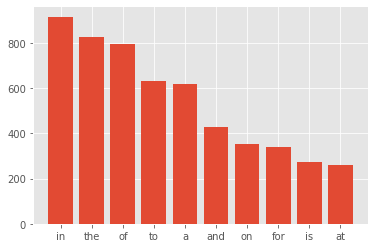

In [212]:
stopwords_promedio(1)

### Análisis signos de puntuación

In [213]:
import string

def signo_punctuacion(clase):
    tweets_stopwords = {}
    for words in X_train[X_train['target'] == clase]['text'].str.split():
        sw = list(set(words).intersection(string.punctuation))
        for w in sw:
            if w in tweets_stopwords.keys():
                tweets_stopwords[w] += 1
            else:
                tweets_stopwords[w] = 1
                
    top = sorted(tweets_stopwords.items(), key=lambda x:x[1],reverse=True)[:20]
    plt.figure(figsize=(10, 5))
    plt.bar(*zip(*top))
    plt.show()

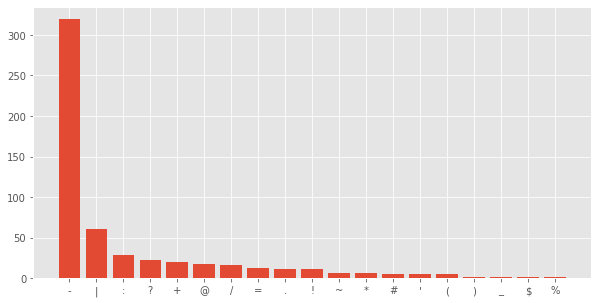

In [214]:
signo_punctuacion(0)

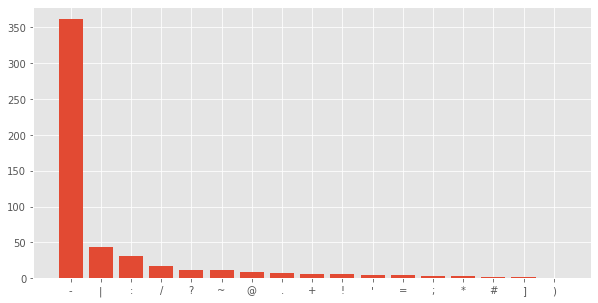

In [215]:
signo_punctuacion(1)

### Análisis de Ngramas

In [216]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(ngram_range=(2, 2))
sum_words = cv.fit_transform(X_train['text']).sum(axis=0)

words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)[:20]

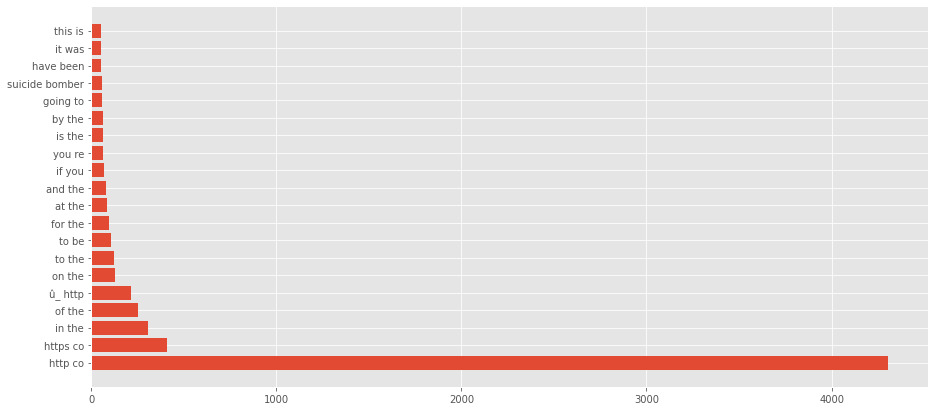

In [217]:
plt.figure(figsize=(15, 7))
plt.barh(*zip(*words_freq))
plt.show()

## 3. Limpieza del conjunto de datos

In [218]:
import re

In [219]:
def limpia_url(texto):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', texto)

In [220]:
limpia_url("https://unipython.com/como-preparar-datos-de-texto-con-scikit-learn/")

''

In [221]:
from html.parser import HTMLParser

class HTMLparser(HTMLParser):
    def __init__(self):
        self.reset()
        self.strict = False
        self.convert_charrefs = True
        self.fed = []
        
    def handle_data(self, d):
        self.fed.append(d)
        
    def get_data(self):
        return ''.join(self.fed)

def limpia_html(texto):
    s = HTMLparser()
    s.feed(texto)
    return s.get_data()

In [222]:
limpia_html('<html><head><title>Test</title></head>'
            '<body><h1>Parse me!</h1></body></html>')

'TestParse me!'

In [223]:
def limpia_emoji(texto):
    emoji_patron = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticones
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_patron.sub(r'', texto)

In [224]:
limpia_emoji("No se gresa a clases por covid 😔😔")

'No se gresa a clases por covid '

In [225]:
def limpieza_puntuacion(texto):
    return texto.translate(str.maketrans('', '', string.punctuation))

In [226]:
limpieza_puntuacion("#odio, la. uni")

'odio la uni'

In [227]:
# Aplicamos nuestras funciones de limpieza del conjunto train
X_train_prep = X_train.copy()

X_train_prep['text'] = X_train['text'].apply(limpia_url)
X_train_prep['text'] = X_train['text'].apply(limpia_html)
X_train_prep['text'] = X_train['text'].apply(limpia_emoji)
X_train_prep['text'] = X_train['text'].apply(limpieza_puntuacion)

In [228]:
# Aplicamos nuestras funciones de limpieza del conjunto test
X_test_prep = X_test.copy()

X_test_prep['text'] = X_test['text'].apply(limpia_url)
X_test_prep['text'] = X_test['text'].apply(limpia_html)
X_test_prep['text'] = X_test['text'].apply(limpia_emoji)
X_test_prep['text'] = X_test['text'].apply(limpieza_puntuacion)

In [229]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(ngram_range=(2, 2))
sum_words = cv.fit_transform(X_train_prep['text']).sum(axis=0)

# Calculamos 
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)[:20]

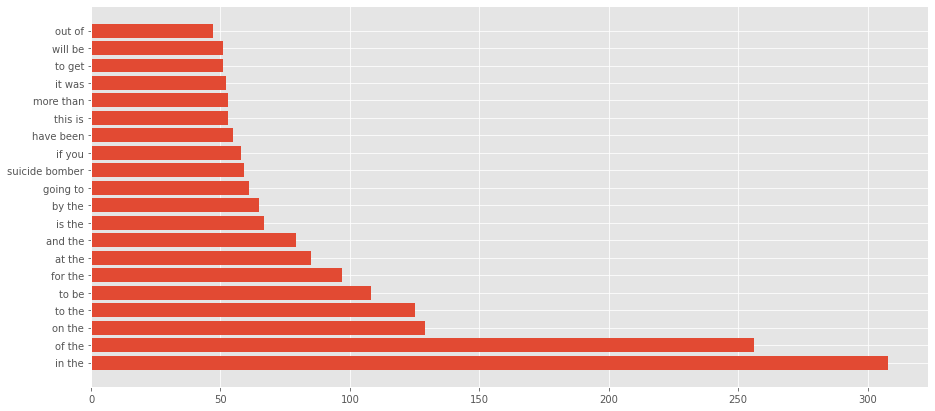

In [230]:
plt.figure(figsize=(15, 7))
plt.barh(*zip(*words_freq))
plt.show()

## 4. Vectorización del conjunto de datos

In [231]:
Y_train = X_train_prep['target']

In [232]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

X_train = vectorizer.fit_transform(X_train_prep['text'])

In [233]:
X_train = X_train.toarray()

In [234]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [235]:
X_test = vectorizer.transform(X_test_prep['text'])
X_test = X_test.toarray()

## 5. División del conjunto de datos

In [236]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.30)

In [237]:
print("tamaño entrenamiento: ", len(X_train))
print("tamaño de validación: ", len(X_val))
print("tamaño pruebas: ", len(X_test))

tamaño entrenamiento:  5329
tamaño de validación:  2284
tamaño pruebas:  3263


In [238]:
X_train.size
 

119337626

## 6. Construcción del modelo

In [239]:
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()

model.add(layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(1, activation='sigmoid'))

In [240]:
model.compile(
    optimizer='adam', 
    loss='binary_crossentropy',
    metrics=['accuracy', 'Precision']
)

In [241]:
Y_train.iloc[1000]

1

In [242]:
from sklearn.model_selection import KFold
 
X= X_train
y = Y_train
hf=KFold(n_splits= 2,  random_state=None, shuffle=False)
for train_index, test_index in kf.split(X ):
  X_entrenamiento, X_prueba = X[train_index], X[test_index]
  Y_entrenamiento, Y_prueba = y.iloc[train_index], y.iloc[test_index]
  history = model.fit(
    X_entrenamiento,
    Y_entrenamiento,
    epochs=10,
    batch_size=1024,
    validation_data=(X_prueba, Y_prueba))
  print(f'\nTrain{train_index}    Test{test_index}\n')
  
  
  

Epoch 1/10
5/5 [==============================] - 2s 232ms/step - loss: 0.6923 - accuracy: 0.5542 - precision: 0.4046 - val_loss: 0.6909 - val_accuracy: 0.5647 - val_precision: 0.0000e+00
Epoch 2/10
5/5 [==============================] - 1s 125ms/step - loss: 0.6888 - accuracy: 0.5811 - precision: 0.9333 - val_loss: 0.6881 - val_accuracy: 0.5647 - val_precision: 0.0000e+00
Epoch 3/10
5/5 [==============================] - 1s 125ms/step - loss: 0.6841 - accuracy: 0.5809 - precision: 1.0000 - val_loss: 0.6847 - val_accuracy: 0.5647 - val_precision: 0.0000e+00
Epoch 4/10
5/5 [==============================] - 1s 119ms/step - loss: 0.6783 - accuracy: 0.5855 - precision: 1.0000 - val_loss: 0.6804 - val_accuracy: 0.5647 - val_precision: 0.0000e+00
Epoch 5/10
5/5 [==============================] - 1s 127ms/step - loss: 0.6705 - accuracy: 0.5980 - precision: 1.0000 - val_loss: 0.6753 - val_accuracy: 0.5647 - val_precision: 0.0000e+00
Epoch 6/10
5/5 [==============================] - 1s 118ms/s

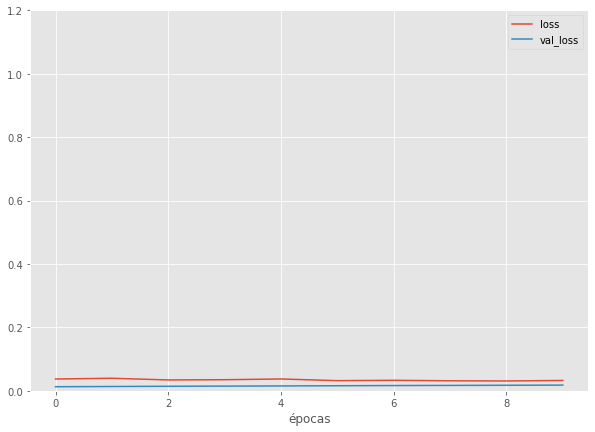

In [243]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history)[['loss', 'val_loss']].plot(figsize=(10, 7))
plt.grid(True)
plt.gca().set_ylim(0, 1.2)
plt.xlabel("épocas")
plt.show()

## 7. Evaluación del modelo

In [246]:
Y_pred = model.predict(X_test).round(0)

In [245]:
for i in range(60):
    print("{} - {}".format(X_test_prep['text'][i], Y_pred[i]))

Just happened a terrible car crash - [0.]
Heard about earthquake is different cities stay safe everyone - [1.]
there is a forest fire at spot pond geese are fleeing across the street I cannot save them all - [1.]
Apocalypse lighting Spokane wildfires - [1.]
Typhoon Soudelor kills 28 in China and Taiwan - [1.]
Were shakingIts an earthquake - [1.]
Theyd probably still show more life than Arsenal did yesterday eh EH - [0.]
Hey How are you - [0.]
What a nice hat - [0.]
Fuck off - [0.]
No I dont like cold - [0.]
NOOOOOOOOO Dont do that - [0.]
No dont tell me that - [0.]
What if - [0.]
Awesome - [0.]
Birmingham Wholesale Market is ablaze BBC News  Fire breaks out at Birminghams Wholesale Market httptcoirWqCEZWEU - [1.]
sunkxssedharry will you wear shorts for race ablaze  - [0.]
PreviouslyOnDoyinTv Toke MakinwaÛªs marriage crisis sets Nigerian Twitter ablaze httptcoCMghxBa2XI - [1.]
Check these out httptcorOI2NSmEJJ httptco3Tj8ZjiN21 httptcoYDUiXEfIpE httptcoLxTjc87KLS nsfw - [0.]
PSA IÛªm 